<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Homework/Galih_tugaas_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.001, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

In [ ]:
def target_function(list_x):
  result = []
  for (x1, x2) in list_x:
    y = int(x1 > x2) # ganti target function dengan komparasi terserah Anda
    result.append(y)
  return np.asarray(result).flatten()

list_x = np.random.randint(-10, 10, size=(40, 2)) # ganti -10 dan 10 dengan angka seterah Anda
list_y = target_function(list_x)
print(list_x)
print(list_y)

[[  7   0]
 [ -2  -7]
 [ -9   0]
 [  4   3]
 [  5  -2]
 [-10   8]
 [ -1   0]
 [ -3 -10]
 [  9  -2]
 [  8  -1]
 [ -1  -2]
 [  6 -10]
 [  4  -6]
 [  1  -1]
 [  5   9]
 [  2  -2]
 [  7  -7]
 [-10  -8]
 [ -2  -5]
 [  2   4]
 [  0  -4]
 [ -6  -3]
 [-10  -9]
 [  8  -5]
 [ -8   4]
 [ -2   7]
 [  2   5]
 [ -5  -4]
 [  6 -10]
 [ -8   0]
 [ -1   8]
 [ -1  -4]
 [  3  -2]
 [  5 -10]
 [-10  -5]
 [ -3   2]
 [  4   6]
 [  6  -3]
 [ -7   4]
 [  6   9]]
[1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0]


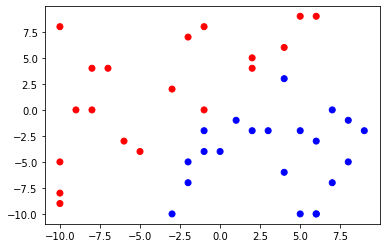

In [ ]:
plot = list_x.transpose()
plt.scatter(plot[0], plot[1], color=np.where(list_y == 1, 'blue', 'red'))

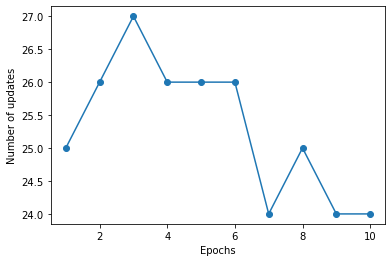

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(list_x, list_y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from IPython.display import display
# from sklearn.linear_model import Perceptron
# from sklearn.metrics import accuracy_score
# from matplotlib.colors import ListedColormap 
# import matplotlib.pyplot as plt 

# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#         'machine-learning-databases/iris/iris.data', header=None)
# df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
# display(df.loc[:])

# X = df[['Petal length', 'Petal width']].values
# y = pd.factorize(df['Class label'])[0]

# # discard exmaples in the first class
# X = X[50:150]
# y = np.where(y[50:150] == 2, -1, y[50:150])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)


# ppn = Perceptron(eta0=0.1, random_state=1) 
# ppn.fit(X_train_std, y_train)
# y_pred = ppn.predict(X_test_std)

# print('Misclassified examples: %d' %(y_test != y_pred).sum())
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
# print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

# print('#Training data points: %d' % X_train.shape[0])
# print('#Testing data points: %d' % X_test.shape[0])
# print('Class labels: %s' % np.unique(y))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Misclassified examples: 3
Accuracy: 0.900
Accuracy: 0.900
#Training data points: 70
#Testing data points: 30
Class labels: [-1  1]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

from sklearn import datasets 
import numpy as np 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


ppn = Perceptron(eta0=0.1, random_state=1) 
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

print('Misclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

Class labels: [0 1 2]
Misclassified examples: 1
Accuracy: 0.978
Accuracy: 0.978
#Training data points: 105
#Testing data points: 45
Class labels: [0 1 2]


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
  cmap = ListedColormap(colors[:len(np.unique(y))])
  #plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
  plt.xlim(xx1.min(), xx1.max()) 
  plt.ylim(xx2.min(), xx2.max()) 
  for idx, cl in enumerate(np.unique(y)): 
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples 
    if test_idx: 
      # plot all examples
      X_test, y_test = X[test_idx, :], y[test_idx] 
      plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o', s=100, label='test set') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


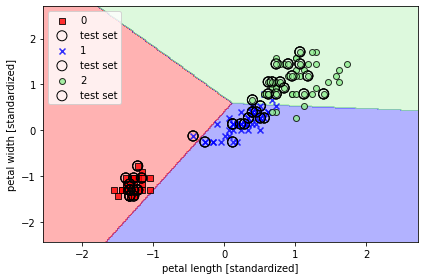

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((y_train, y_test)) 
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150)) 
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left')
plt.tight_layout() 
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.001, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

In [ ]:
def target_function(list_x):
  result = []
  for (x1, x2) in list_x:
    y = int(x1 > 0) 
    result.append(y)
  return np.asarray(result).flatten()
list_x = np.random.randint(100, 150, size=(40, 2))
list_y = target_function(list_x)
print(list_x)
print(list_y)

In [ ]:
plot = list_x.transpose()
plt.scatter(plot[0], plot[1])

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(list_x, list_y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()